# STA130 Homework 08

*So... We have arrived... The final level...*

Links to ChatGPT Chat Logs:

Questions 1-9 - CDTs

https://chatgpt.com/share/6740e242-35dc-800d-8ea4-82112fbbd039

Question 3 - EDAs:

https://chatgpt.com/share/6740e26c-d2cc-800d-8d84-107d1fac0b8e

## Question 1

### What are CDTs? What Problems do they address?

**Classification Decision Trees (CDTs) are a non-parametric, hierarchial model that attemps to split an original group of predictors into smaller groups** and maximizes homogeneity within each group, with each group represented as some categorical outcome variable. **CDTs attempt to do this by recursively applying decision rules** (sometimes called "nodes") that split the predictor entities into one subset or another, making each subset at each "node" as distinct as possible in terms of the target outcome variables.

CDTs are non-parametric, meaning that the predictors and outcome variables **do not need to take some "functional" form**, such as linearity, quadratic, etc. This makes CDTs much more flexible in terms of what can be inputted as predictors as well as outcome variables, and **be more robust when predictors have interactions between them**. (We've seen in previous HWs that interactions can be quite complex and bothersome)

In short, CDTs attempt to partition the data into "regions", with each region containing discrete predictor "items". Each "region" corresponds to a "leaf node" of the CDT, each represeting one of the outcome (target) variables. The way these regions are partitioned aims to minimize the "impurity" of the region, where higher "purity" meaning more correctly categorized predictors in each region.

**CDTs are designed to and are mainly used to solve classification problems**, to categorize predictors (objects) into categories (or more technically called "classes") based on the characteristics of the predictor.

**In the real world, CDTs are widely used in medical related fields, such as medical diagnosis.** A CDT can be used to identify whether or not a patient has a certain disease or not based on the characteristics of the patiet, such as symptoms, lab results, or even imaging results. In the modelling *(might be more commonly called "training" in the field of machine learning)* process (which we will demonstrate later), the algorithm chooses which characteristics are most useful in distinguishing between one class or another, and chooses the specific value(s) that separate the inputs into the classes.

For example, the root (top/first) node might separate patients into two groups based on whether or not they have a fever, then in subsequent nodes, the groups are further split based on other (maybe repeating) characteristics, such as, "blood pressure > 140mmHg" into one group, and "blood pressure <= 140mmHg" into another group. This process is continued until all patients have been categorized into one group or another, "has the disease" or "does not have the disease". Then, when we want to use the CDT to categorize a new patient, we simply follow the tree down the path with the patient's features.

### CDTs vs MLR models

We've previously (in other HWs) looked at Multiple Linear Regression (MLR), and seen how MLRs take in predictors and come up with a prediction of the outcome based on the predictor. We've also seen how MLR models can use both categorical data and numerical data as predictors and also output both types of data. This is similar to a CDT, where both types of data can be used to predict both types of data, but CDTs and MLR models are fundamentally different. CDTs go through the process of classification to come up with outcomes, while MLRs go through the process of regression.

For regression, we are finding best values of **coefficients** to fit a **function** to a set of predictors, the final form of a regression model is a **function** (a **linear function** for MLR). This is fundamentally different compared to classification, where **partition (classification) rules** are defined to **partition** a predictor space (a group of predictors) into hierarchial regions, and the final result of a classification model is a **tree** like structure.

For MLR, when making a prediction, we input values for predictors, and calculate the final result by multiplying predictor variables with the coefficients. For CDTs, we make predictions by following the rules specified by each node in the tree, and follow the path down until the leaf nodes are reached, where a predictor is finally classified into a particular class.

## Question 2

Before we start, I want to first start by identifying what $TP$, $TN$, $FP$, $FN$ are:

$TP$: True Positive, when the prediction is **positive**, and the real outcome is also **positive**.

$TN$: True Negative, when the prediction is **negative**, and the real outcome is also **negative**.

$FP$: False Positive, when the prediction is **positive**, but the real outcome is **negative**.

$FN$: False Negative, when the prediction is **negative**, but the real outcome is **positive**.

### Accuracy

Accuracy measures the overall correctness of the model. It is the propotion of total predictions that the model got correct (both positives and negatives), it is calculated by:

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

A real word example could be spam email filters. For a spam email filtering model, a true positve is when a spam email is correctly identified as a spam, and a true negative is when non-spam email is correctly identified as non-spam.

We value accuracy the most in this example the most because we care about the accuracy of both positive and negatives equally. It is equally important that spam email isn't identified as non-spam, as we really just don't want spam email, and that non-spam email isn't identified as spam, as we might not be able to see important email in time.

*This may not seen very obvious as of now, but examples for other metrics later we will talk about will show the difference.*

### Sensitivity

Sensitivity measures how well the model identifies positive cases. It is the proportion of actual positives that the model got correct, it is calculated by:

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

A real world example could be cancer detection, where a true positive is when a patient that has cancer is correctly identified as a cancer patient, and a false negative is when a patient that doesn't have cancer is falsely identified as a cancer patient.

We value sensitivity in this example the most because we care about the model being able to correctly identify patients the most. Cancer patients are in urgent need of treatment, otherwise they may face severe deline in health and even death. Therefore correctly identifying patients is the utmost important thing for such a model, while the other cases, such as false positives, when falsely identifying a patient as a cancer patient, have much less consequences and/or have the least affect on stakeholders of the model.

### Specificity

Specificity measures how well the model identifies negative cases. It is the proportion of actual negatives that the model got correct, it is calculated by:

$$\text{Specificity} = \frac{TN}{TN + FP}$$

A real world example could be fraud detection, where a true negative is when a transaction that is non-fraudulent is correctly classified as non-fraudulent, and a false positive is when a non-fraudulent transaction is falsely identified as fraudulent. When true negatives are high, leading to higher specificity, the number of false negatives 

We calue specificity the most in this example when we care the most about ensuring that the customers being able to conveniently complete transactions. Therefore, we value the true negative rate the most, when true negatives are high, it means that most of the non-fraudulent transactions are correctly identified, and the transaction is completed for the customer without obstruction.

### Precision

Precision measures accuracy of positive predictions. It is the proportion of positive predictions that are actually correct, it is calculated by:

$$\text{Precision} = \frac{TP}{TP + FP}$$

A real world example could be predicting crime risk of individuals, where a true positive is when a person is correctly identified as likely to commit a crime(s), and a false positive is when a person is wrongly identified as likely to commit a crime(s).

We value precision in this example the most because we want to ensure that those who are actually going to commit crimes are identified and flagged (possibly put under surveilance), so that they do not continuously pose a risk to society by remaining not flagged. As the same for other cases, the consequences of not being able to identify a person with high crime risks are far higher than other outcomes, such as falsely flagging a person with low crime risks.

## Question 3

I wasn't sure what EDAs were, so I went for a quick search.

EDAs aim to summarize, visualize and attempt to understand data to uncover patterns, identify anomalies, and inform further analysis.

In the following code I attempt to pre-process the data to meet the requirements and briefly provide initial EDAs.

In [63]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop unwanted columns and rows
unwanted_columns = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(unwanted_columns, axis=1)
ab_reduced_noNaN = ab_reduced.dropna(ignore_index=True)

# Specify column and type to convert to
convert_types = {'Pub year': 'int',
                 'NumPages': 'int',
                 'Hard_or_Paper': 'category'}

# Set type
ab_reduced_noNaN = ab_reduced_noNaN.astype(convert_types)
ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
314,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192,HarperCollins,2004,60572345,1.1
315,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160,Worth Publishers,2011,1429233443,0.7
316,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224,St Martin's Griffin,2005,031233446X,0.7
317,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480,W. W. Norton & Company,2010,393934942,0.9


In [27]:
ab_reduced_noNaN.shape

(319, 10)

In [28]:
ab_reduced_noNaN.describe()

,List Price,Amazon Price,NumPages,Pub year,Thick
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,18.362978,12.941034,334.272727,2002.175549,0.903448
std,13.976755,12.436673,161.601510,10.646133,0.365261
min,1.500000,0.770000,24.000000,1936.000000,0.100000
25%,13.890000,8.600000,208.000000,1998.000000,0.600000
50%,15.000000,10.200000,320.000000,2005.000000,0.900000
75%,19.360000,12.560000,416.000000,2010.000000,1.100000
max,139.950000,139.950000,896.000000,2011.000000,2.100000


In [29]:
ab_reduced_noNaN.describe(include='object')

,Title,Author,Publisher,ISBN-10
count,319,319,319,319
unique,309,251,158,316
top,The Great Gatsby,Jodi Picoult,Vintage,743273567
freq,3,7,37,2


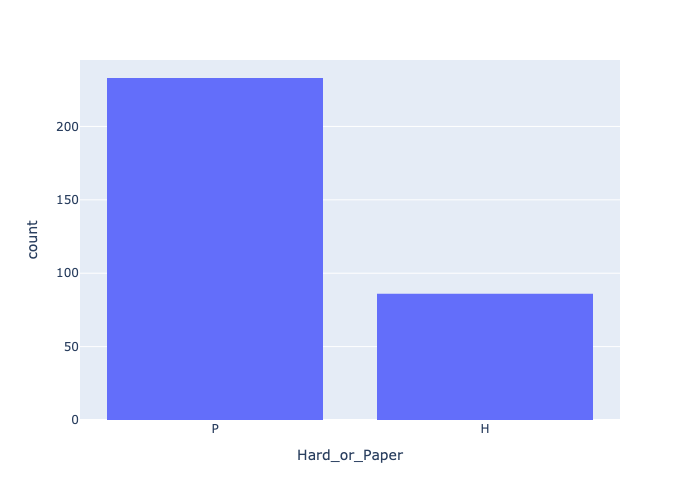

In [65]:
# px bot plox?
fig = px.histogram(ab_reduced_noNaN, x='Hard_or_Paper')
fig.show(renderer='png')

A lot more paperback books compared to hard covers...

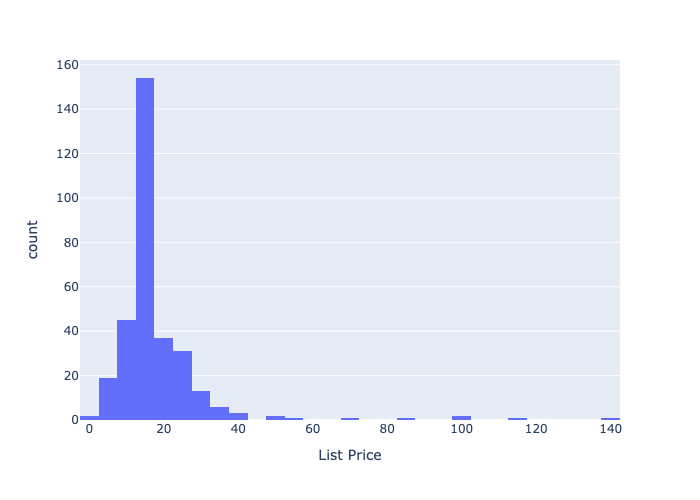

In [70]:
# histogram of Pub year
fig = px.histogram(ab_reduced_noNaN, x='List Price')
fig.show(renderer='png')

Wow, lots of books in the 15-20 price range...

Oh! I wanna try the really cool scatter plot with a slider thing! There are enough variables here to make that I think, let's try:

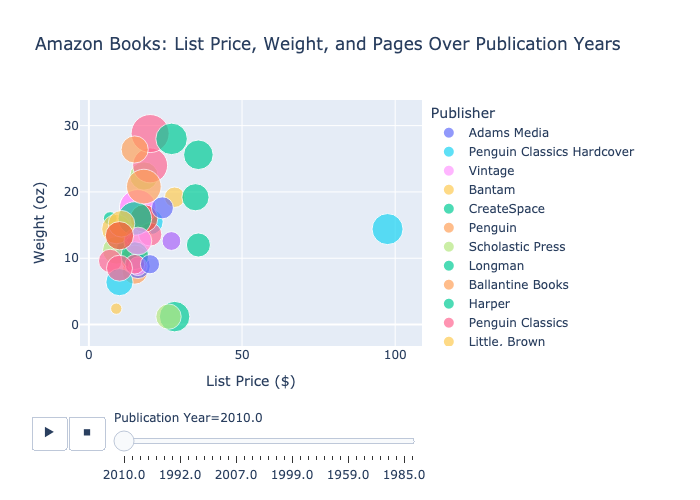

In [78]:
# Drop rows with missing or invalid values in relevant columns
cleaned_books_df = ab.dropna(subset=["List Price", "Weight_oz", "NumPages", "Publisher", "Pub year"])

# Ensure all necessary columns are of appropriate types
cleaned_books_df.loc[:, "Pub year"] = cleaned_books_df["Pub year"].astype(int)

# Create the updated dynamic bubble chart with smaller bubbles
fig = px.scatter(
    cleaned_books_df,
    x="List Price",
    y="Weight_oz",
    size="NumPages",
    color="Publisher",
    animation_frame="Pub year",
    hover_name="Title",
    size_max=30,  # Reduce the maximum bubble size
    title="Amazon Books: List Price, Weight, and Pages Over Publication Years",
    labels={
        "List Price": "List Price ($)",
        "Weight_oz": "Weight (oz)",
        "NumPages": "Number of Pages",
        "Pub year": "Publication Year",
        "Publisher": "Publisher",
    },
)

# Display the plot
fig.show(renderer='png')

# No renderer='png' here cause its animated?
# idk the slider won't work if I add it
# oh shoot, it just won't show on github without renderer='png'
# ok then...

Still doesn't look great but, It's pretty good compared to what I had in [HW03](https://github.com/HDEnt327/sta130/blob/main/HW/STA130_HW03.ipynb) I guess...

Ok let's move on.

## Question 4

In [31]:
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2)
ab_reduced_noNaN_train.shape[0] # row count

255

In [32]:
ab_reduced_noNaN_test.shape[0]

64

The training dataset has 255 observations, and the testing dataset has 64 observations.

For the following two lines of code:

```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
```

The first line creates dummy/indicator variable for the `Hard_or_Paper` column, where each unique category in the column becomes a separate column, one for Hardcover, `H`, and one for Paperback, `P`. The rows that are `H` will have a 1 in the `H` column, and 0 in others, same for the `P` column. This new dataframe is `y`, the outcome variable.

The second line takes a column from the `ab_reduced_noNaN` dataframe and creates a new dataframe with one column. This new dataframe is `x`, the predicator variable.

The two lines define what data are used as the predictor, and what data are used for the outcome (target) classes.

Following is the code for "training" the tree:

In [ ]:
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

# Create a DecisionTreeClassifier with max depth of 2
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model to the data
clf.fit(X, y)

# Print the trained tree's properties (optional, for verification)
print(f"Tree depth: {clf.get_depth()}")
print(f"Number of leaves: {clf.get_n_leaves()}")

Tree depth: 2
Number of leaves: 4


Note how we only use the `train` dataset to train the model, not the main `ab_reduced_noNaN` dataset or the `test` dataset.

Now let's see the results with a visualization of the resulting tree:

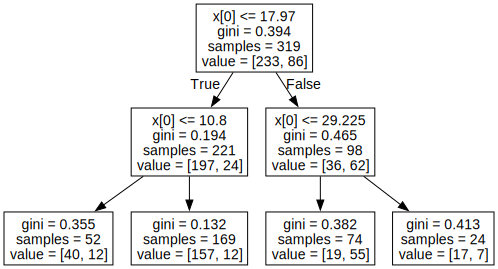

In [34]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = gv.Source(dot_data) 
graph

This is an initial example of the process of creating a CDT and what one might look like through a visualization. We see on the second line of each node there is a `gini` value, this is exactly the "impurity" value we've discussed before, and the goal of the CDT model is to minimize this gini value as much as possible.

At the top of each node there is a condition, for example, in the root note of the visualization above, the condition for a predictor to have a "true" value (or "positive" value, which in this case is being a Hard cover book) is if the price `x[0]` was less than or equal to 17.97. So, when making a prediction, the model will look at the price variable, if it satisfies the condition, it is put into the corresponding node on the next level, which, may be a leaf node, or in our example, are another level of conditional nodes that split the predictors once again.

To put it all together, when our model makes a prediction, it looks at whether or not the `x[0]` variable of the predictor is less than or equal to 17.97. For those predictors that are true, their `x[0]` variable is looked at once again to see if they are less than or equal to 10.8, and the predictors finally reach a final category. For those that are false, their `x[0]` variable is also looked at again to see if they are less than or equal to 29.225, and also reaching a final leaf node.

Again, note that leaf nodes are the final categorization result for a prediction.

## Question 5



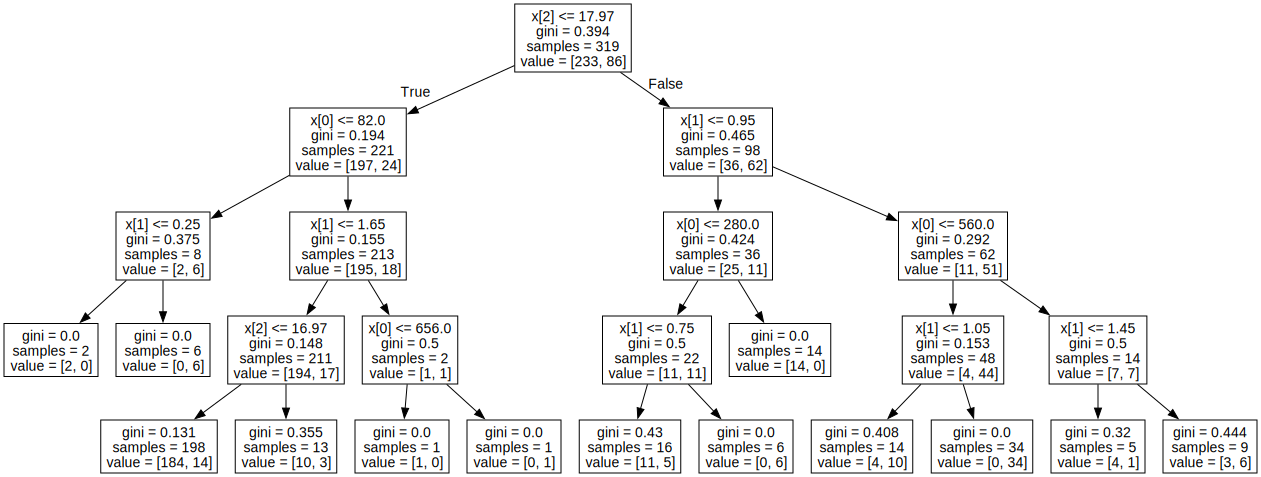

In [ ]:
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = gv.Source(dot_data) 
graph

This CDT model is much more complicated than the previous one due to two main changes made to how the model is trained. First of all, we have changed the predictor variables the model uses to make predictions. In `clf`, we only used the `List Price` variable, while in `clf2`, we have also used `NumPages`, `Thick`, and `List Price` in our predictors. When fitting our model, we have changed the maximum depth of the tree (which are the maximum number of nodes, excluding leaf nodes, there are vertically) from 2 in `clf` to 4 now in `clf2`, this makes the tree have more chances to make decisions based on more features of the predictors, and therefore make better predictions due to the higher specificity (this is not referring to the specificity metric, but rather how specific the predictors used describe the observations).

In this new model, the `x[0]` variable is `NumPages`, `x[1]` is `Thick`, and `x[2]` is `List Price`. The model is looks at all these tree variables to make decisions. For example, in the root node of the tree, it looks at the `NumPages` variable to split the predictor spaces into two regions, and then on the `True` side, it uses the `NumPages` variable, while the `False` side uses the `Thick` variable. This is once again repeated, but with each node using difference variables to make decisions, until it reaches the leaf node where each predictor in the predictor space is cateogorized into one group or another.

It is important to note that, although having more "depth" in the CDT model can lead to higher accuracy, which may seen good, it has the same risk of using complex specification in multiple linear regression, **overfitting**. When we use so much complexity to build a MLR model that it is too much for the available data, the model essentially "memorizes" the data that it was trained on, resulting in bad generalizability and perform bad when fed with data the model hasn't seen before. The same applies to CDT trees, as when enough depth is allowed for the CDT, we eventually may end up with the tree so accurately classifying the predictors that we have one node for each predictor, and when we input data into the CDT that it hasn't seen before, it will not be able to correctly predict the outcome.

## Question 6



Here's how we can create a confusion matrix:

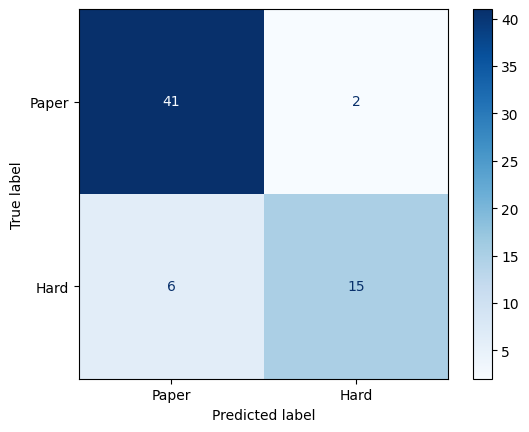

In [57]:
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test = ab_reduced_noNaN_test[['List Price']]
X_test2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# making prediction on the clf model with the test data
y_pred_clf = clf.predict(X_test)
# clf2
y_pred_clf2 = clf2.predict(X_test2)

# creating the confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# display
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paper', 'Hard'])
disp_clf.plot(cmap="Blues") # clf

Note how we're using the `test` dataset now to create the confusion matrix, because the we are trying to see how *"confused"* the model is if we feed it new data it hasn't seen before. We always test our models on unseen data to ensure the genralizability of our models.

Now for `clf2`:

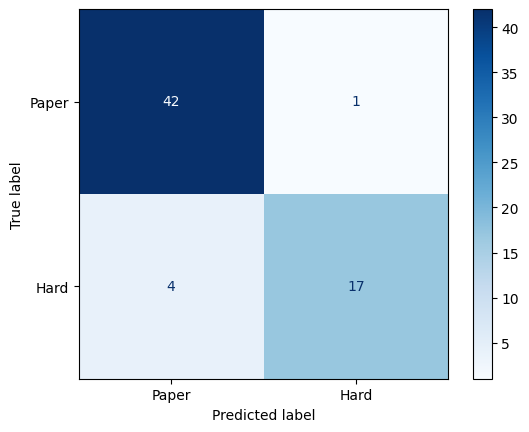

In [54]:
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paper', 'Hard'])
disp_clf2.plot(cmap="Blues") # clf2

This is a confusion matrix, it is **a way of visually representing how well the model is performing**, based on the results of the predictions made by the model, and the actual outcome of the corresponding predictors. From the confusion matrix, we can see each of the four states of the prediction made by the CDT, $TP$, $TN$, $FP$, and $FN$. Each box in the confusion matrix represents one state, and the number in the box represents how many of the predictions the model made belong to this state. In our example, the state of being `True` is for being a hard cover book, therefore, to read the confusion matrix, the bottom right, where the label `Hard` is on both axis, is the $TP$ state, where the model correctly identifies hard cover books. Consequently, $TN$ state is the top left, $FP$ is top right, and $FN$ is bottom left.

With the amount of predictions in each state represented, we can calculate each of the model metrics we've explained earlier. Luckily, we don't have to do these by hand, as the `sklearn` library has functions for each of the metrics:

In [59]:
accuracy = accuracy_score(y_test, y_pred_clf)
accuracy2 = accuracy_score(y_test, y_pred_clf2)

sensitivity = recall_score(y_test, y_pred_clf)
sensitivity2 = recall_score(y_test, y_pred_clf2)

tn, fp, fn, tp = cm_clf.ravel()  # tn, fp, fn, tp for clf
tn2, fp2, fn2, tp2 = cm_clf2.ravel()  # tn, fp, fn, tp for clf2

specificity = tn / (tn + fp)
specificity2 = tn2 / (tn2 + fp2)

print(f"Accuracy of clf: {accuracy}")
print(f"Accuracy of clf2: {accuracy2}\n")
print(f"Sensitivity of clf: {sensitivity}")
print(f"Sensitivity of clf2: {sensitivity2}\n")
print(f"Specificity of clf: {specificity}")
print(f"Specificity of clf2: {specificity2}\n")

Accuracy of clf: 0.875
Accuracy of clf2: 0.921875

Sensitivity of clf: 0.7142857142857143
Sensitivity of clf2: 0.8095238095238095

Specificity of clf: 0.9534883720930233
Specificity of clf2: 0.9767441860465116



It seens like our `clf2` model, which uses more predictor variables to make predictions and has more depth, is performing better than the `clf` model, which only used thr `List Price` to make predictions, as `clf2` is showing a higher value in each of the metrics.

## Question 7



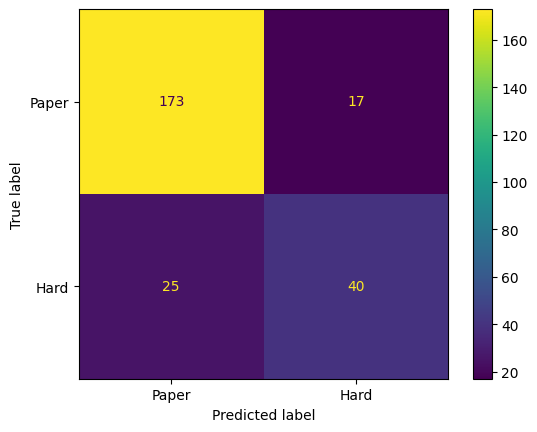

In [47]:
ConfusionMatrixDisplay(
    confusion_matrix(pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H'], 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

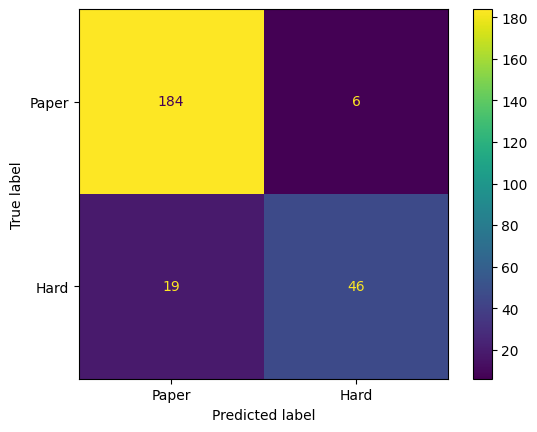

In [51]:
ConfusionMatrixDisplay(
    confusion_matrix(pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H'], 
                     clf2.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The main difference between the confusion matrix that was just created are **the data that were used to test the model and generate the confusion matrix.** In [Question 6](#question-6), we used the `test` dataset to calculate the $TP$, $TN$, $FP$ and $FN$ counts, which are put into the confusion matrix for visualization, while in the confusion matrix above, we've used the `train` data for the evaluation, which should be avoided. The goal for creating a predictive model is to that it can **generalize and predict accurately for any data** that is inputted into it, therefore, **we should always use new data that the model has not seen before to perform testing and evaluations,** to prevent issues such as **overfitting**.

## Question 8



**Feature Importances** in CDT models measure **how much a certain predictor variable contributes** in improving the decision rules to minimize `gini impurity` throughout all nodes of the model.

We can visualize how much each variable contributes to the `clf2` model we've created earlier by the following:

*Note that we aren't using `clf` because there was only one variable involved.*

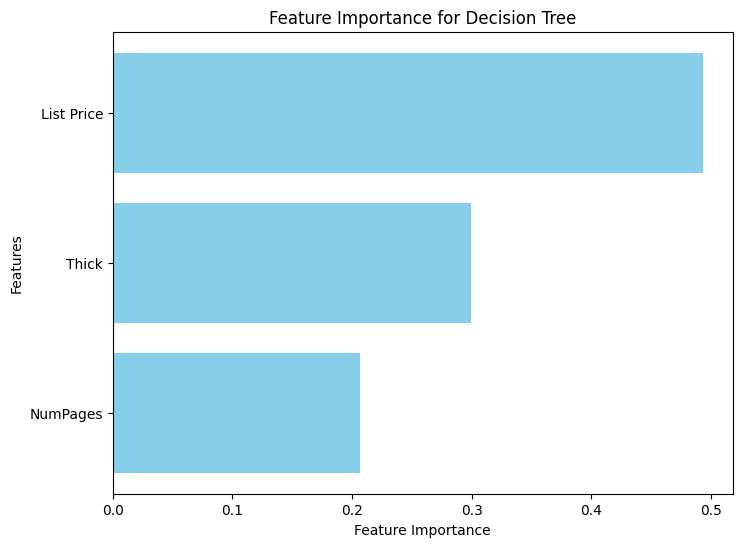

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf is your trained DecisionTreeClassifier and X is your feature matrix

# Extract feature names and their importance
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]
feature_importances = clf2.feature_importances_

# Sort features by importance (optional, for better visualization)
indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = feature_importances[indices]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Decision Tree')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

We can see from the graph above that the feature `List Price` has the highest feature importance throughout the `clf2` model, with a feature importance of near 0.5.

## Question 9



We might recall previously when exploring multiple linear regression that the coefficients for each predictor variable in a MLR model represent the magnitude at which a change in the current variable has on influencing the prediction the MLR model makes.

This is quite fundamentally different from feature importances in CDT models, as not only do CDT models give binary classifications while MLR models give continuous values, the feature importances in CDT models simply measure how **frequently and effectively** a certain variable contributes to splitting data in decision nodes, where as coefficients in MLR models give the **magnitude and direction** of influence from the variable towards the outcome.

Cutting it short, the feature importances in CDT models do not show on any degree the magnitude of change in the outcome due to a change in the predictor, it is simply the frequency and effectiveness of the variable in making decisions.

## Question 10

Yes